In [68]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [96]:
# 데이터 
# https://www.kaggle.com/sengzhaotoo/movielens-small

ratings = pd.read_csv('./data/ratings.csv')
movies = pd.read_csv('./data/movies.csv')

pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 300)

movie_ratings = pd.merge(ratings, movies, on='movieId')
print(movie_ratings)

        userId  movieId  rating   timestamp                                 title                                genres
0            1       31     2.5  1260759144                Dangerous Minds (1995)                                 Drama
1            7       31     3.0   851868750                Dangerous Minds (1995)                                 Drama
2           31       31     4.0  1273541953                Dangerous Minds (1995)                                 Drama
3           32       31     4.0   834828440                Dangerous Minds (1995)                                 Drama
4           36       31     3.0   847057202                Dangerous Minds (1995)                                 Drama
...        ...      ...     ...         ...                                   ...                                   ...
99999      664    64997     2.5  1343761859              War of the Worlds (2005)                         Action|Sci-Fi
100000     664    72380     3.5  1344435

# User-based Collaborative Filtering

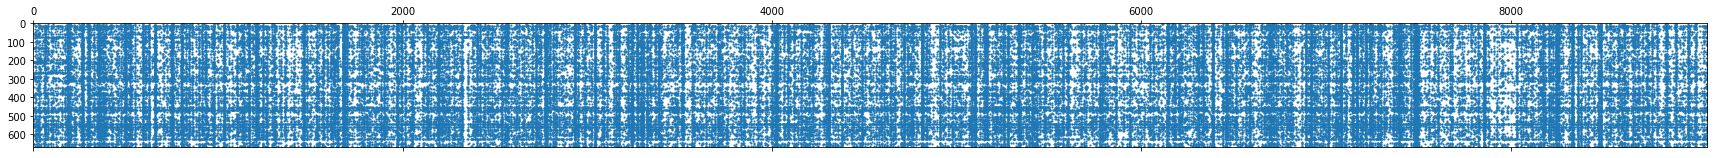

In [97]:
# 평점 테이블
title_user = movie_ratings.pivot_table('rating', index='userId', columns='title')
plt.figure(figsize=(30, 5))
plt.spy(title_user, markersize=1);

In [98]:
title_user.fillna(0, inplace=True)
print(title_user)

title   "Great Performances" Cats (1998)  $9.99 (2008)  'Hellboy': The Seeds of Creation (2004)  'Neath the Arizona Skies (1934)  'Round Midnight (1986)  ...  xXx (2002)  xXx: State of the Union (2005)  ¡Three Amigos! (1986)  À nous la liberté (Freedom for Us) (1931)  İtirazım Var (2014)
userId                                                                                                                                                    ...                                                                                                                                   
1                                    0.0           0.0                                      0.0                              0.0                     0.0  ...         0.0                             0.0                    0.0                                        0.0                  0.0
2                                    0.0           0.0                                      0.0                              0.0     

In [99]:
from sklearn.metrics.pairwise import cosine_similarity

user_based_collab = cosine_similarity(title_user, title_user)
print(user_based_collab)

[[1.         0.         0.         ... 0.06291708 0.         0.01746565]
 [0.         1.         0.12429498 ... 0.02413984 0.17059464 0.1131753 ]
 [0.         0.12429498 1.         ... 0.08098382 0.13660585 0.17019275]
 ...
 [0.06291708 0.02413984 0.08098382 ... 1.         0.04260878 0.08520194]
 [0.         0.17059464 0.13660585 ... 0.04260878 1.         0.22867673]
 [0.01746565 0.1131753  0.17019275 ... 0.08520194 0.22867673 1.        ]]


In [100]:
user_based_collab = pd.DataFrame(user_based_collab, index=title_user.index, columns=title_user.index)
print(user_based_collab)

userId       1         2         3         4         5    ...       667       668       669       670       671
userId                                                    ...                                                  
1       1.000000  0.000000  0.000000  0.074482  0.016818  ...  0.000000  0.000000  0.062917  0.000000  0.017466
2       0.000000  1.000000  0.124295  0.118821  0.103646  ...  0.425462  0.084646  0.024140  0.170595  0.113175
3       0.000000  0.124295  1.000000  0.081640  0.151531  ...  0.124562  0.124911  0.080984  0.136606  0.170193
4       0.074482  0.118821  0.081640  1.000000  0.130649  ...  0.088735  0.068483  0.104309  0.054512  0.211609
5       0.016818  0.103646  0.151531  0.130649  1.000000  ...  0.058252  0.042926  0.038358  0.062642  0.225086
...          ...       ...       ...       ...       ...  ...       ...       ...       ...       ...       ...
667     0.000000  0.425462  0.124562  0.088735  0.058252  ...  1.000000  0.091597  0.018416  0.153111  0

In [101]:
# user1과 유사한 사람들
print(user_based_collab[1].sort_values(ascending=False)[:10])

userId
1      1.000000
325    0.371852
634    0.194093
341    0.162819
310    0.157524
207    0.152746
35     0.130585
195    0.122647
485    0.114021
130    0.112817
Name: 1, dtype: float64


In [102]:
# user1과 유사한 사람이 좋아하는 영화
result = title_user.query('userId==325').sort_values(ascending=False, by=325, axis=1) # 325 index에 따라 값을 sorting
print(result)

title   Beverly Hills Cop (1984)  Dangerous Minds (1995)  Brady Bunch Movie, The (1995)  My Best Friend's Wedding (1997)  Sleepers (1996)  ...  From Dusk Till Dawn (1996)  From Beyond (1986)  Frogs for Snakes (1998)  Fritz the Cat (1972)  İtirazım Var (2014)
userId                                                                                                                                     ...                                                                                                                    
325                          4.5                     4.5                            4.0                              4.0              3.5  ...                         0.0                 0.0                      0.0                   0.0                  0.0

[1 rows x 9064 columns]


In [103]:
title_user.query('userId==325')
# user_based_collab.loc[325, :]

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),...,xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,
325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [104]:
movie_title = 'Dark Knight, The (2008)' 

# 평점 추정---------------------------------------------------------------------

# 유사도만큼의 가중치를 주면서 영화 평점을 계산 
user_index_list = user_based_collab[325][title_user[movie_title] != 0].sort_values(ascending=False)[:10].index.tolist()   # movie_title에 rating이 부과된 사람들 중 유사도가 높은 userId
user_weight_list = user_based_collab[325][title_user[movie_title] != 0].sort_values(ascending=False)[:10].tolist()         # cosine 유사도 값

                                
weighted_sum = []
for i in range(0, 10):
    weighted_sum.append(title_user[movie_title][user_index_list[i]] * user_weight_list[i] / sum(user_weight_list)) 
print(f'325번 user의 <Dark Knight, The (2008)> 예상 평점: {sum(weighted_sum)} using user-based CF')

325번 user의 <Dark Knight, The (2008)> 예상 평점: 3.902111108426821 using user-based CF


In [105]:
# 추천 영화---------------------------------------------------------------------
no_rated_movies_user_325 = title_user.columns[title_user.loc[325, :] == 0].tolist() 

rating_pred_list = []
for movie_title in no_rated_movies_user_325:
    user_index_list = user_based_collab[325][title_user[movie_title] != 0].sort_values(ascending=False)[:10].index.tolist()   
    user_weight_list = user_based_collab[325][title_user[movie_title] != 0].sort_values(ascending=False)[:10].tolist()       

    weighted_sum = []
    if len(user_index_list) == 10: # 평점 개수가 10개 미만인 영화는 제외
      for i in range(0, 10):
          weighted_sum.append(title_user[movie_title][user_index_list[i]] * user_weight_list[i] / sum(user_weight_list)) 
      rating_pred_list.append([movie_title, sum(weighted_sum)])
  
# print(rating_pred_list[:3])

rating_pred_list.sort(key=lambda x: -x[1])
print(rating_pred_list[:10])
top10 = rating_pred_list[:10]
for i, (title, rating_pred) in enumerate(top10):
    print("추천 영화 {} : {}".format(i+1, title))

[['Star Wars: Episode IV - A New Hope (1977)', 4.704852092705693], ['Shawshank Redemption, The (1994)', 4.701330994743778], ["Schindler's List (1993)", 4.692309783027743], ['Lord of the Rings: The Fellowship of the Ring, The (2001)', 4.667574172396881], ['Godfather, The (1972)', 4.6528830033375295], ['Star Wars: Episode V - The Empire Strikes Back (1980)', 4.632861260403452], ['Fight Club (1999)', 4.608514834845723], ['Boot, Das (Boat, The) (1981)', 4.570415376935302], ['Best Years of Our Lives, The (1946)', 4.566016465574957], ['Inside Job (2010)', 4.565497136063438]]
추천 영화 1 : Star Wars: Episode IV - A New Hope (1977)
추천 영화 2 : Shawshank Redemption, The (1994)
추천 영화 3 : Schindler's List (1993)
추천 영화 4 : Lord of the Rings: The Fellowship of the Ring, The (2001)
추천 영화 5 : Godfather, The (1972)
추천 영화 6 : Star Wars: Episode V - The Empire Strikes Back (1980)
추천 영화 7 : Fight Club (1999)
추천 영화 8 : Boot, Das (Boat, The) (1981)
추천 영화 9 : Best Years of Our Lives, The (1946)
추천 영화 10 : Inside 

# Item-based Collaborative Filtering

In [106]:
# 평점 테이블
user_title = movie_ratings.pivot_table('rating', index='title', columns='userId')
user_title.fillna(0, inplace=True)
print(user_title)

userId                                     1    2    3    4    5    ...  667  668  669  670  671
title                                                               ...                         
"Great Performances" Cats (1998)           0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
$9.99 (2008)                               0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
'Hellboy': The Seeds of Creation (2004)    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
'Neath the Arizona Skies (1934)            0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
'Round Midnight (1986)                     0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
...                                        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
xXx (2002)                                 0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
xXx: State of the Union (2005)             0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
¡Three Amigos! (1986)         

In [107]:
# 영화끼리 유사도
from sklearn.metrics.pairwise import cosine_similarity

item_based_collab = cosine_similarity(user_title, user_title)
print(item_based_collab)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.05821787 0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.05821787 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [108]:
# 325번 유저가 평점을 부여한 영화(20개) 중에서 <Dark Knight, The (2008)>와 유사한 영화들을 이용(top5)
movie_title = 'Dark Knight, The (2008)'
item_based_collab = pd.DataFrame(item_based_collab, index=user_title.index, columns = user_title.index)
# print(item_based_collab['Dark Knight, The (2008)'].sort_values(ascending=False)[:10])
item_sim_sorted_series = item_based_collab[movie_title][item_based_collab.columns[user_title[325] != 0].tolist()].sort_values(ascending=False)

In [109]:
item_index_list = item_sim_sorted_series[:5].index.tolist()
item_weight_list = item_sim_sorted_series[:5].values.tolist()

                                
weighted_sum = []
for i in range(5):
    weighted_sum.append(user_title.loc[item_index_list[i], 325] * item_weight_list[i] / sum(item_weight_list)) 
print(f'325번 user의 <Dark Knight, The (2008)> 예상 평점: {sum(weighted_sum)} using item-based CF')

325번 user의 <Dark Knight, The (2008)> 예상 평점: 2.7130783353179844 using item-based CF


In [134]:
# 추천 영화---------------------------------------------------------------------
no_rated_movies_user_325 = user_title.index[user_title.loc[:, 325] == 0].tolist() 

rating_pred_list = []
for movie_title in no_rated_movies_user_325:
    item_sim_sorted_series = item_based_collab[movie_title][item_based_collab.columns[user_title[325] != 0]].sort_values(ascending=False)
    item_index_list = item_sim_sorted_series[:5].index.tolist()
    item_weight_list = item_sim_sorted_series[:5].values.tolist()  

    weighted_sum = []
    if sum([x != 0 for x in item_weight_list]) == 5:
        for i in range(5):
            weighted_sum.append(user_title.loc[item_index_list[i], 325] * item_weight_list[i] / sum(item_weight_list)) 
        rating_pred_list.append((movie_title, sum(weighted_sum)))
  
# print(rating_pred_list[:3])

rating_pred_list.sort(key=lambda x: -x[1])
print(rating_pred_list[:10])
top10 = rating_pred_list[:10]
for i, (title, rating_pred) in enumerate(top10):
    print("추천 영화 {} : {}".format(i+1, title))

[('Die Hard: With a Vengeance (1995)', 3.865550318225255), ('Hard Rain (1998)', 3.858331818289378), ("It's Pat (1994)", 3.758698662148557), ('Cooler, The (2003)', 3.7188896906207467), ('GoldenEye (1995)', 3.708985436990697), ('Identity (2003)', 3.6488985810481367), ('Down Periscope (1996)', 3.6438542534068223), ('Gone Baby Gone (2007)', 3.627906372038924), ('Spy Kids (2001)', 3.593089525909225), ("Brewster's Millions (1985)", 3.5584744049808243)]
추천 영화 1 : Die Hard: With a Vengeance (1995)
추천 영화 2 : Hard Rain (1998)
추천 영화 3 : It's Pat (1994)
추천 영화 4 : Cooler, The (2003)
추천 영화 5 : GoldenEye (1995)
추천 영화 6 : Identity (2003)
추천 영화 7 : Down Periscope (1996)
추천 영화 8 : Gone Baby Gone (2007)
추천 영화 9 : Spy Kids (2001)
추천 영화 10 : Brewster's Millions (1985)
